In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


In [2]:
# CNS2 Defn

data = LymeData({CHRONIC, NEURO},{ADDL_CIR, DIAG_CIR, CATG},{NEURO, NON_NEURO}, defn=DEF_CNS2, drop_99=True)
data.drop_one_label(NON_NEURO) # SINGLE LABEL

print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, Xtestreconerr_distr = ssnmf.gridsearch(param_range={'k': range(2,7),'lambda': list(np.linspace(0,1,100)), 'random_state': range(0,100)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(878, 28)
Index(['recall a tick bite', 'length of time noticed tick bite',
       'treated with antibiotics', 'length of time treated for tick bite',
       'period of time for diagnosis', 'misdiagnosis', 'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia', 'Bio Sex', 'Antibiotics', 'Times Infected', 'GROC',
       'Bed Days', 'Mental Health Days', 'Physical Health Days', 'Disability',
       'general practitioner', 'infectious disease specialist', 'internist',
       'lyme specialist', 'other doctor', 'pediatrician', 'rheumatologist',
       'neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


KeyboardInterrupt: 

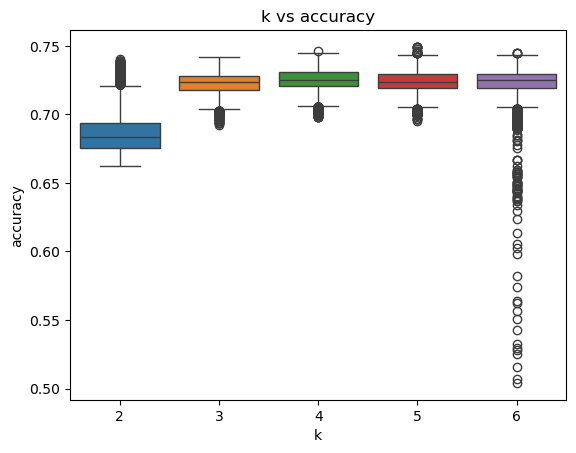

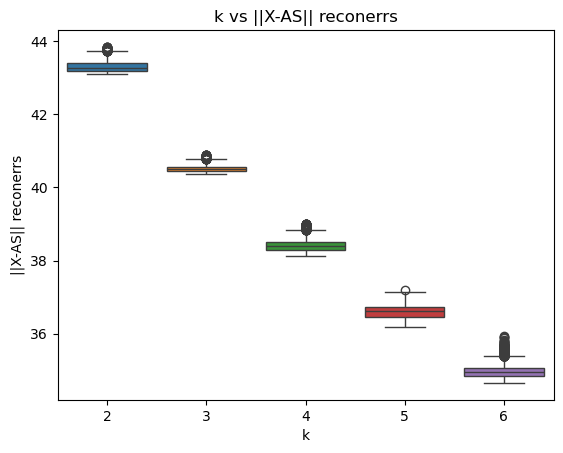

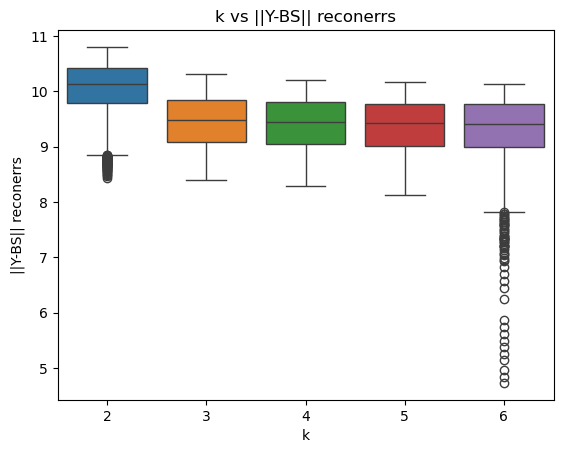

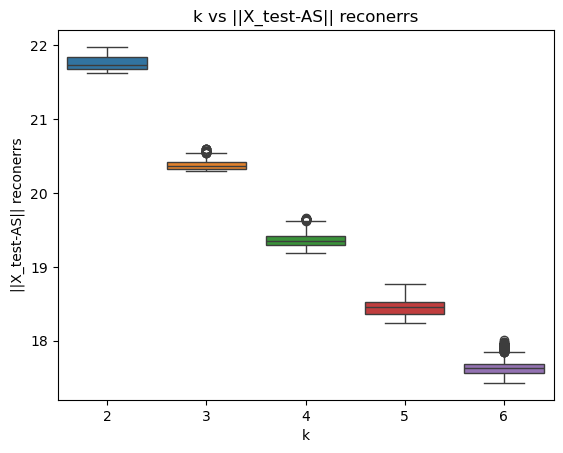

CNS1 Working Definition: Neuro vs Non-Neuro
best accuracy:  0.749209726443769  best params:  {'k': 5, 'lambda': 0.7373737373737375, 'random_state': 90}
test_accuracy:  (0.6988636363636364, 20.344425119361862)


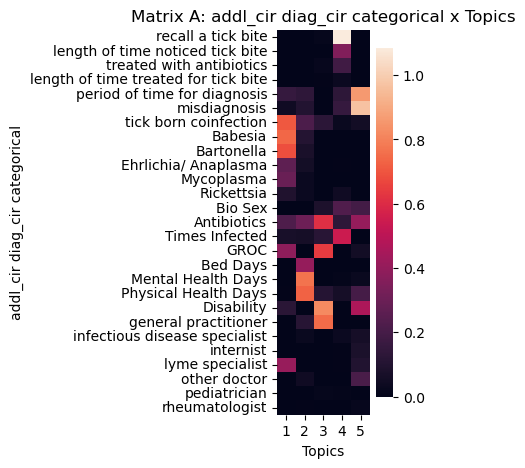

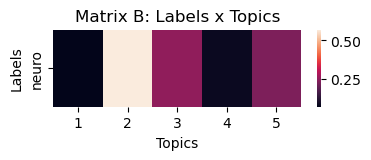

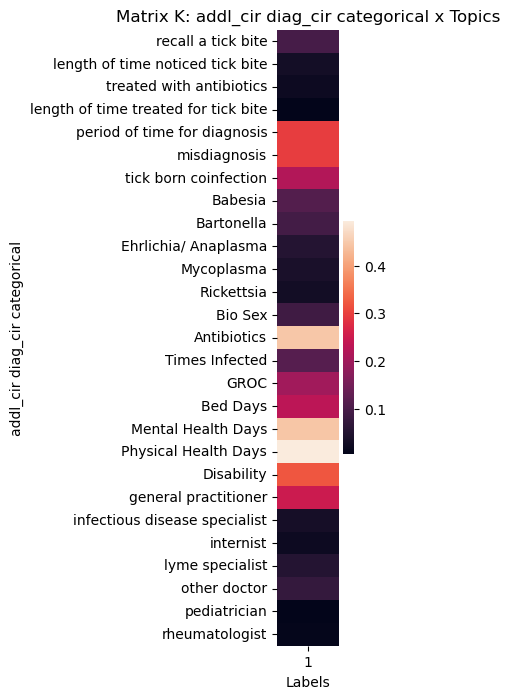

In [9]:

display_distr(accu_distr)
display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')
display_distr(Xtestreconerr_distr, ylabel='||X_test-AS|| reconerrs')

print('CNS1 Working Definition: Neuro vs Non-Neuro')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = ADDL_CIR + " "+ DIAG_CIR + " " + CATG
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)

# Total Neuro: 2569
# Total Non-Neuro: 1394

In [5]:
accu_distr.to_csv('CNS2_NvN_SL_accu_distr.csv', index=False)
Xreconerr_distr.to_csv('CNS2_NvN_SL_Xreconerr_distr.csv', index=False)
Yreconerr_distr.to_csv('CNS2_NvN_SL_Yreconerr_distr.csv', index=False)
Xtestreconerr_distr.to_csv('CNS2_NvN_SL_Xcvtst_reconerr_distr.csv', index=False)

In [6]:
# Accuracy distribution statistics
mean = accu_distr.mean()
Q1 = accu_distr.quantile(0.25)
Q3 = accu_distr.quantile(0.75)
print('Mean Accuracy:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Accuracy:
2    0.686979
3    0.723253
4    0.725251
5    0.723964
6    0.723105
dtype: float64
IQR:
2    0.018571
3    0.010000
4    0.009970
5    0.009909
6    0.009959
dtype: float64


In [7]:
# Xreconerr distribution statistics
mean = Xreconerr_distr.mean()
Q1 = Xreconerr_distr.quantile(0.25)
Q3 = Xreconerr_distr.quantile(0.75)
print('Mean Xreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Xreconerr_distr:
2    43.300668
3    40.510696
4    38.418698
5    36.606716
6    34.973348
dtype: float64
IQR:
2    0.224731
3    0.135008
4    0.215699
5    0.276842
6    0.211212
dtype: float64


In [8]:
# Yreconerr distribution statistics
mean = Yreconerr_distr.mean()
Q1 = Yreconerr_distr.quantile(0.25)
Q3 = Yreconerr_distr.quantile(0.75)
print('Mean Yreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Yreconerr_distr:
2    10.066810
3     9.462365
4     9.419762
5     9.384760
6     9.354615
dtype: float64
IQR:
2    0.631120
3    0.764042
4    0.746347
5    0.763695
6    0.781342
dtype: float64


In [9]:
# Yreconerr distribution statistics
mean = Xtestreconerr_distr.mean()
Q1 = Xtestreconerr_distr.quantile(0.25)
Q3 = Xtestreconerr_distr.quantile(0.75)
print('Mean Yreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Yreconerr_distr:
2    21.761939
3    20.378136
4    19.360209
5    18.444193
6    17.632015
dtype: float64
IQR:
2    0.173719
3    0.085147
4    0.131263
5    0.163107
6    0.113381
dtype: float64
